In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from IPython.display import display, HTML
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model

In [2]:
data = pd.read_csv("data/housing.csv", sep=";")

Aufgabe 1:
Teil 1:
- Mehrdimensionale Lineare Regression auf einem Datensatz (https://github.com/ageron/handson-ml/blob/master/datasets/housing/)
- Vorverarbeitung der Daten (Skalierung, kategorische Attribute: http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)
- Aufteilung in Test & Train
- Berechnung der Fehler der Vorhersage auf dem Test-Datensatz
- Anpassung der Inputdaten (Feature Engineering)
- Niedrigster MSE auf einem (für alle der gleiche) Test-Datensatz gewinnt
Teil 2
So wie Teil 1 nur mit kNeighborsRegression als Vorhersageverfahren

# Looking at the data

In [3]:
print(data.isnull().sum().sum()) #nr of nans
#data.isnull().values.any() # only gives true/false
print(data.shape)

207
(20640, 10)


In [4]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY

In [5]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

# Preprocessing

### Encoding categorical features

In [6]:
enc_labels = preprocessing.LabelEncoder()
enc_ohe = preprocessing.OneHotEncoder(sparse=False) #easier to read

In [7]:
enc_labels.fit(data["ocean_proximity"])
new_ocean_prox = enc_labels.transform(data["ocean_proximity"])
print(new_ocean_prox)
new_ocean_arr = enc_ohe.fit_transform(new_ocean_prox.reshape(-1, 1))
new_ocean_df = pd.DataFrame(data = new_ocean_arr, columns = list(enc_labels.classes_))

[3 3 3 ... 1 1 1]


In [8]:
data_new = pd.concat([data,new_ocean_df],axis=1)
display(data_new)
data_new.drop("ocean_proximity",axis = 1,inplace = True)
data_new

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
5        -122.25     37.85                  52          919           213.0   
6        -122.25     37.84                  52         2535           489.0   
7        -122.25     37.84                  52         3104           687.0   
8        -122.26     37.84                  42         2555           665.0   
9        -122.25     37.84                  52         3549           707.0   
10       -122.26     37.85                  52         2202           434.0   
11       -122.26     37.85                  52         3503           752.0   
12       -122.26     37.85                  52         2491           474.0   
13       -122.26     37.84                  52          696           191.0   
14       -122.26     37.85                  52         2643           626.0   
15       -122.26     37.85                  50         1120           283.0   
16       -122.27     37.85                  52         1966           347.0   
17       -122.27     37.85                  52         1228           293.0   
18       -122.26     37.84                  50         2239           455.0   
19       -122.27     37.84                  52         1503           298.0   
20       -122.27     37.85                  40          751           184.0   
21       -122.27     37.85                  42         1639           367.0   
22       -122.27     37.84                  52         2436           541.0   
23       -122.27     37.84                  52         1688           337.0   
24       -122.27     37.84                  52         2224           437.0   
25       -122.28     37.85                  41          535           123.0   
26       -122.28     37.85                  49         1130           244.0   
27       -122.28     37.85                  52         1898           421.0   
28       -122.28     37.84                  50         2082           492.0   
29       -122.28     37.84                  52          729           160.0   
...          ...       ...                 ...          ...             ...   
20610    -121.56     39.10                  28         2130           484.0   
20611    -121.55     39.10                  27         1783           441.0   
20612    -121.56     39.08                  26         1377           289.0   
20613    -121.55     39.09                  31         1728           365.0   
20614    -121.54     39.08                  26         2276           460.0   
20615    -121.54     39.08                  23         1076           216.0   
20616    -121.53     39.08                  15         1810           441.0   
20617    -121.53     39.06                  20          561           109.0   
20618    -121.55     39.06                  25         1332           247.0   
20619    -121.56     39.01                  22         1891           340.0   
20620    -121.48     39.05                  40          198            41.0   
20621    -121.47     39.01                  37         1244           247.0   
20622    -121.44     39.00                  20          755           147.0   
20623    -121.37     39.03                  32         1158           244.0   
20624    -121.41     39.04                  16         1698           300.0   
20625    -121.52     39.12                  37          102            17.0   
20626    -121.43     39.18                  36         1124           184.0   
20627    -121.32     39.13                   5          358            65.0   
20628    -121.48     39.10                  19         20

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
5        -122.25     37.85                  52          919           213.0   
6        -122.25     37.84                  52         2535           489.0   
7        -122.25     37.84                  52         3104           687.0   
8        -122.26     37.84                  42         2555           665.0   
9        -122.25     37.84                  52         3549           707.0   
10       -122.26     37.85                  52         2202           434.0   
11       -122.26     37.85                  52         3503           752.0   
12       -122.26     37.85                  52         2491           474.0   
13       -122.26     37.84                  52          696           191.0   
14       -122.26     37.85                  52         2643           626.0   
15       -122.26     37.85                  50         1120           283.0   
16       -122.27     37.85                  52         1966           347.0   
17       -122.27     37.85                  52         1228           293.0   
18       -122.26     37.84                  50         2239           455.0   
19       -122.27     37.84                  52         1503           298.0   
20       -122.27     37.85                  40          751           184.0   
21       -122.27     37.85                  42         1639           367.0   
22       -122.27     37.84                  52         2436           541.0   
23       -122.27     37.84                  52         1688           337.0   
24       -122.27     37.84                  52         2224           437.0   
25       -122.28     37.85                  41          535           123.0   
26       -122.28     37.85                  49         1130           244.0   
27       -122.28     37.85                  52         1898           421.0   
28       -122.28     37.84                  50         2082           492.0   
29       -122.28     37.84                  52          729           160.0   
...          ...       ...                 ...          ...             ...   
20610    -121.56     39.10                  28         2130           484.0   
20611    -121.55     39.10                  27         1783           441.0   
20612    -121.56     39.08                  26         1377           289.0   
20613    -121.55     39.09                  31         1728           365.0   
20614    -121.54     39.08                  26         2276           460.0   
20615    -121.54     39.08                  23         1076           216.0   
20616    -121.53     39.08                  15         1810           441.0   
20617    -121.53     39.06                  20          561           109.0   
20618    -121.55     39.06                  25         1332           247.0   
20619    -121.56     39.01                  22         1891           340.0   
20620    -121.48     39.05                  40          198            41.0   
20621    -121.47     39.01                  37         1244           247.0   
20622    -121.44     39.00                  20          755           147.0   
20623    -121.37     39.03                  32         1158           244.0   
20624    -121.41     39.04                  16         1698           300.0   
20625    -121.52     39.12                  37          102            17.0   
20626    -121.43     39.18                  36         1124           184.0   
20627    -121.32     39.13                   5          358            65.0   
20628    -121.48     39.10                  19         20

### (Replacing NaNs)

In [9]:
# replacing the 207 NaNs in column total_bedroom by mean of the column

In [10]:
#imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
#imp.fit([data_new["total_bedrooms"]])
#print(data_new["total_bedrooms"].shape)
#test = imp.transform([data_new["total_bedrooms"]])
#with pd.option_context('display.max_rows', 30, 'display.max_columns', 250): # shows the whole df 
#    display(pd.DataFrame(test))
"""
data_new["total_bedrooms"].fillna(data_new["total_bedrooms"].mean(),inplace = True)
with pd.option_context('display.max_rows', 1000, 'display.max_columns', 300): # shows more of the df
    display(data_new["total_bedrooms"])
    """

'\ndata_new["total_bedrooms"].fillna(data_new["total_bedrooms"].mean(),inplace = True)\nwith pd.option_context(\'display.max_rows\', 1000, \'display.max_columns\', 300): # shows more of the df\n    display(data_new["total_bedrooms"])\n    '

## Scatter matrices

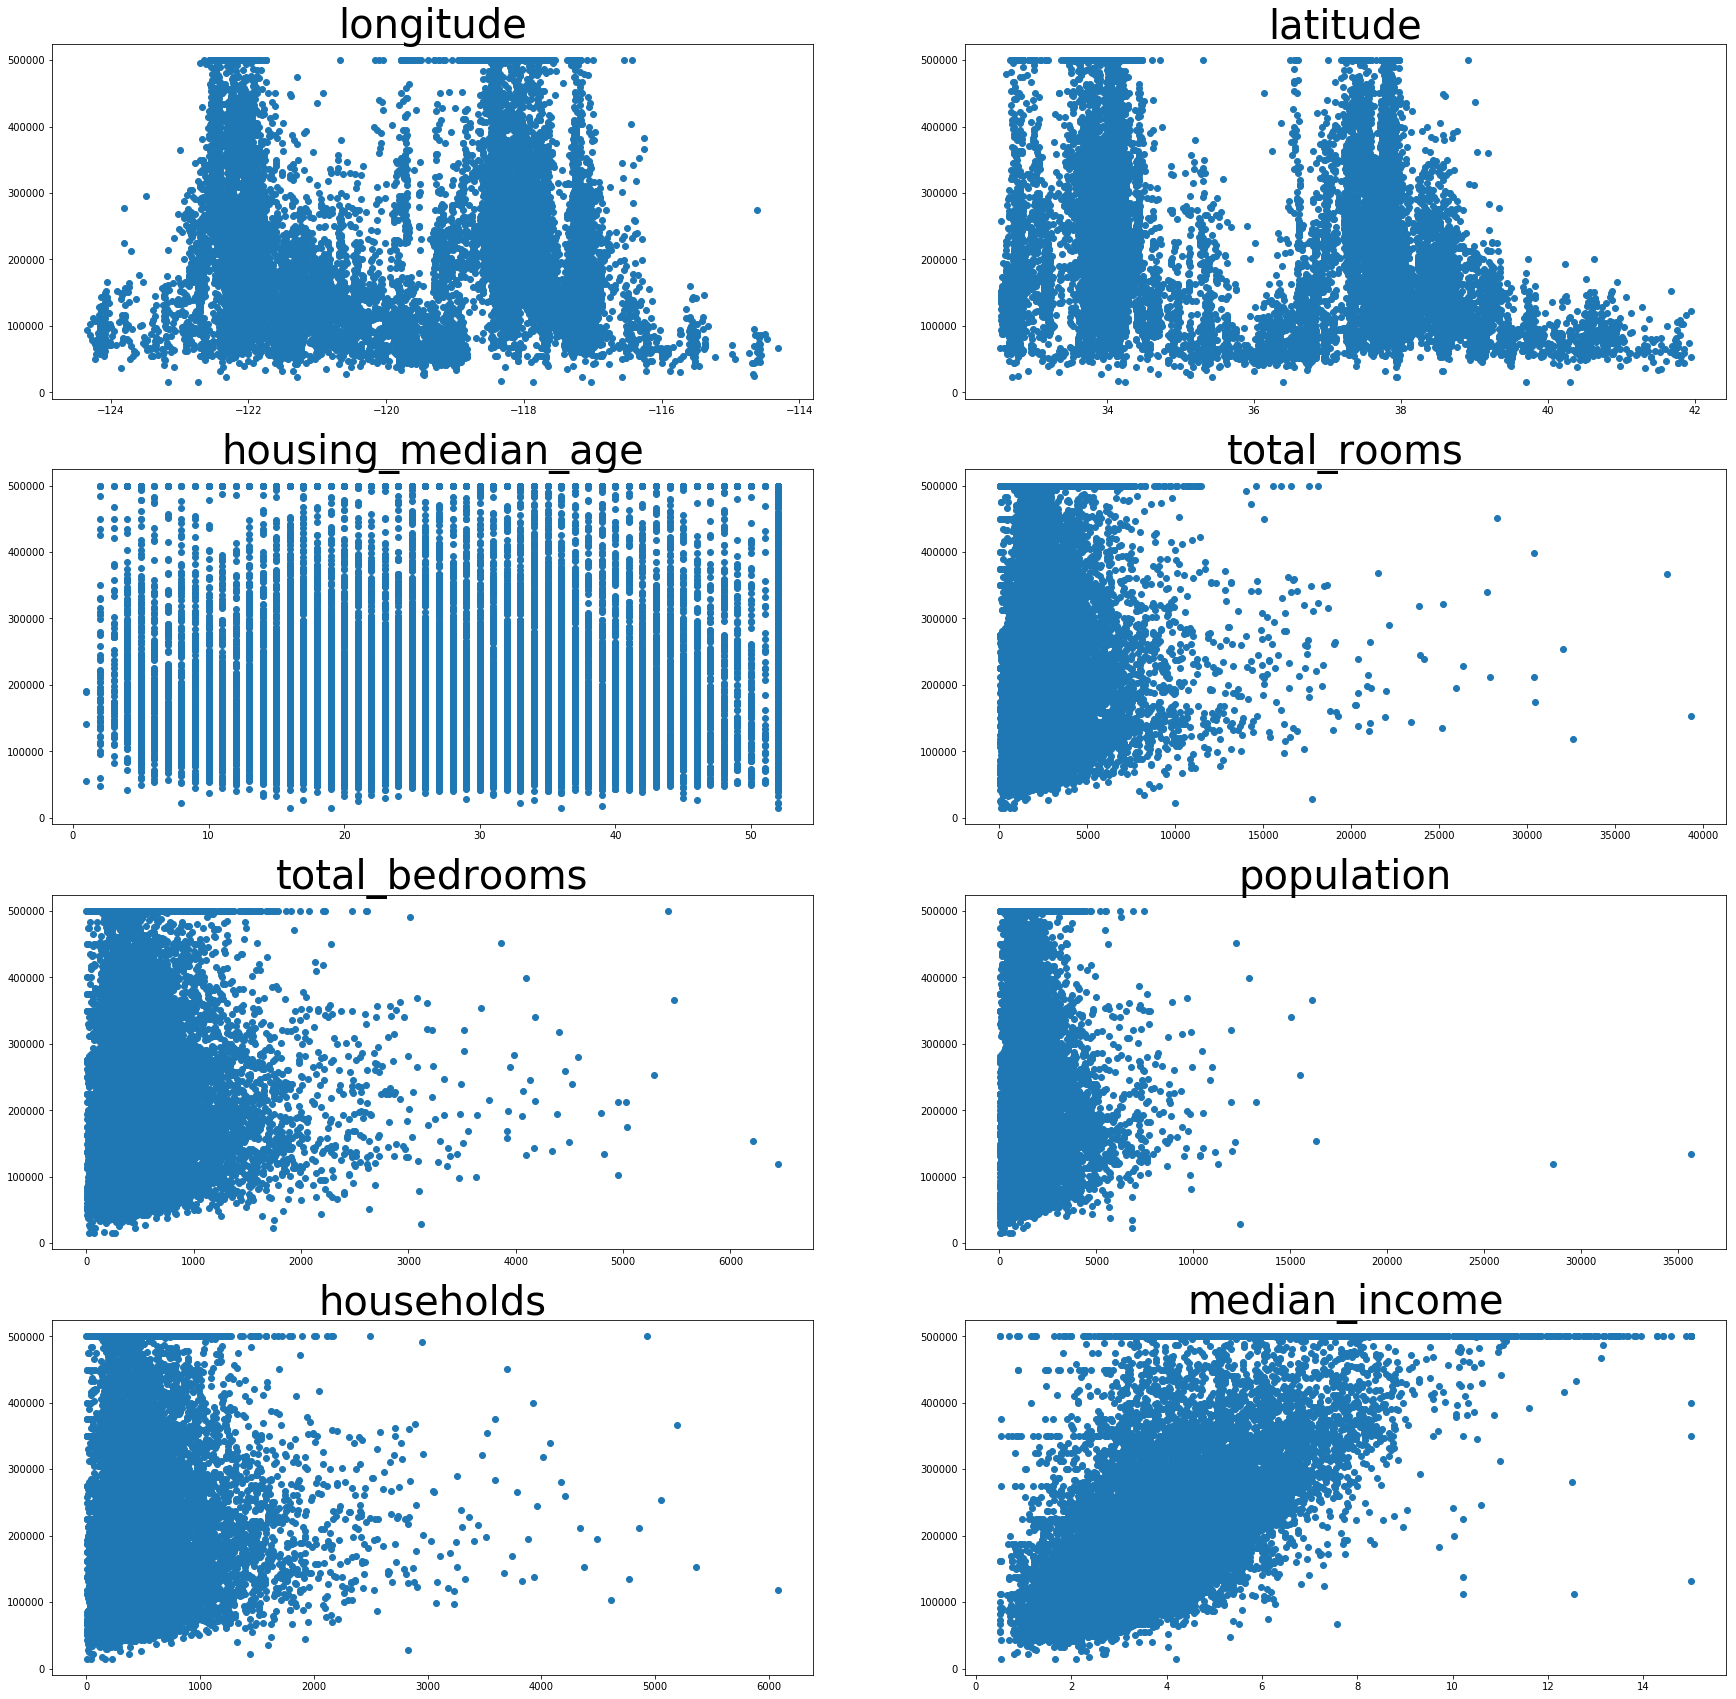

In [11]:
fig = plt.figure(figsize = (30,30))
for col in range(0,8):
    plt.subplot(4,2,col+1)
    plt.scatter(data_new.iloc[:,col],data_new["median_house_value"])
    plt.title(data_new.columns[col],fontsize=40)

[[None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, No

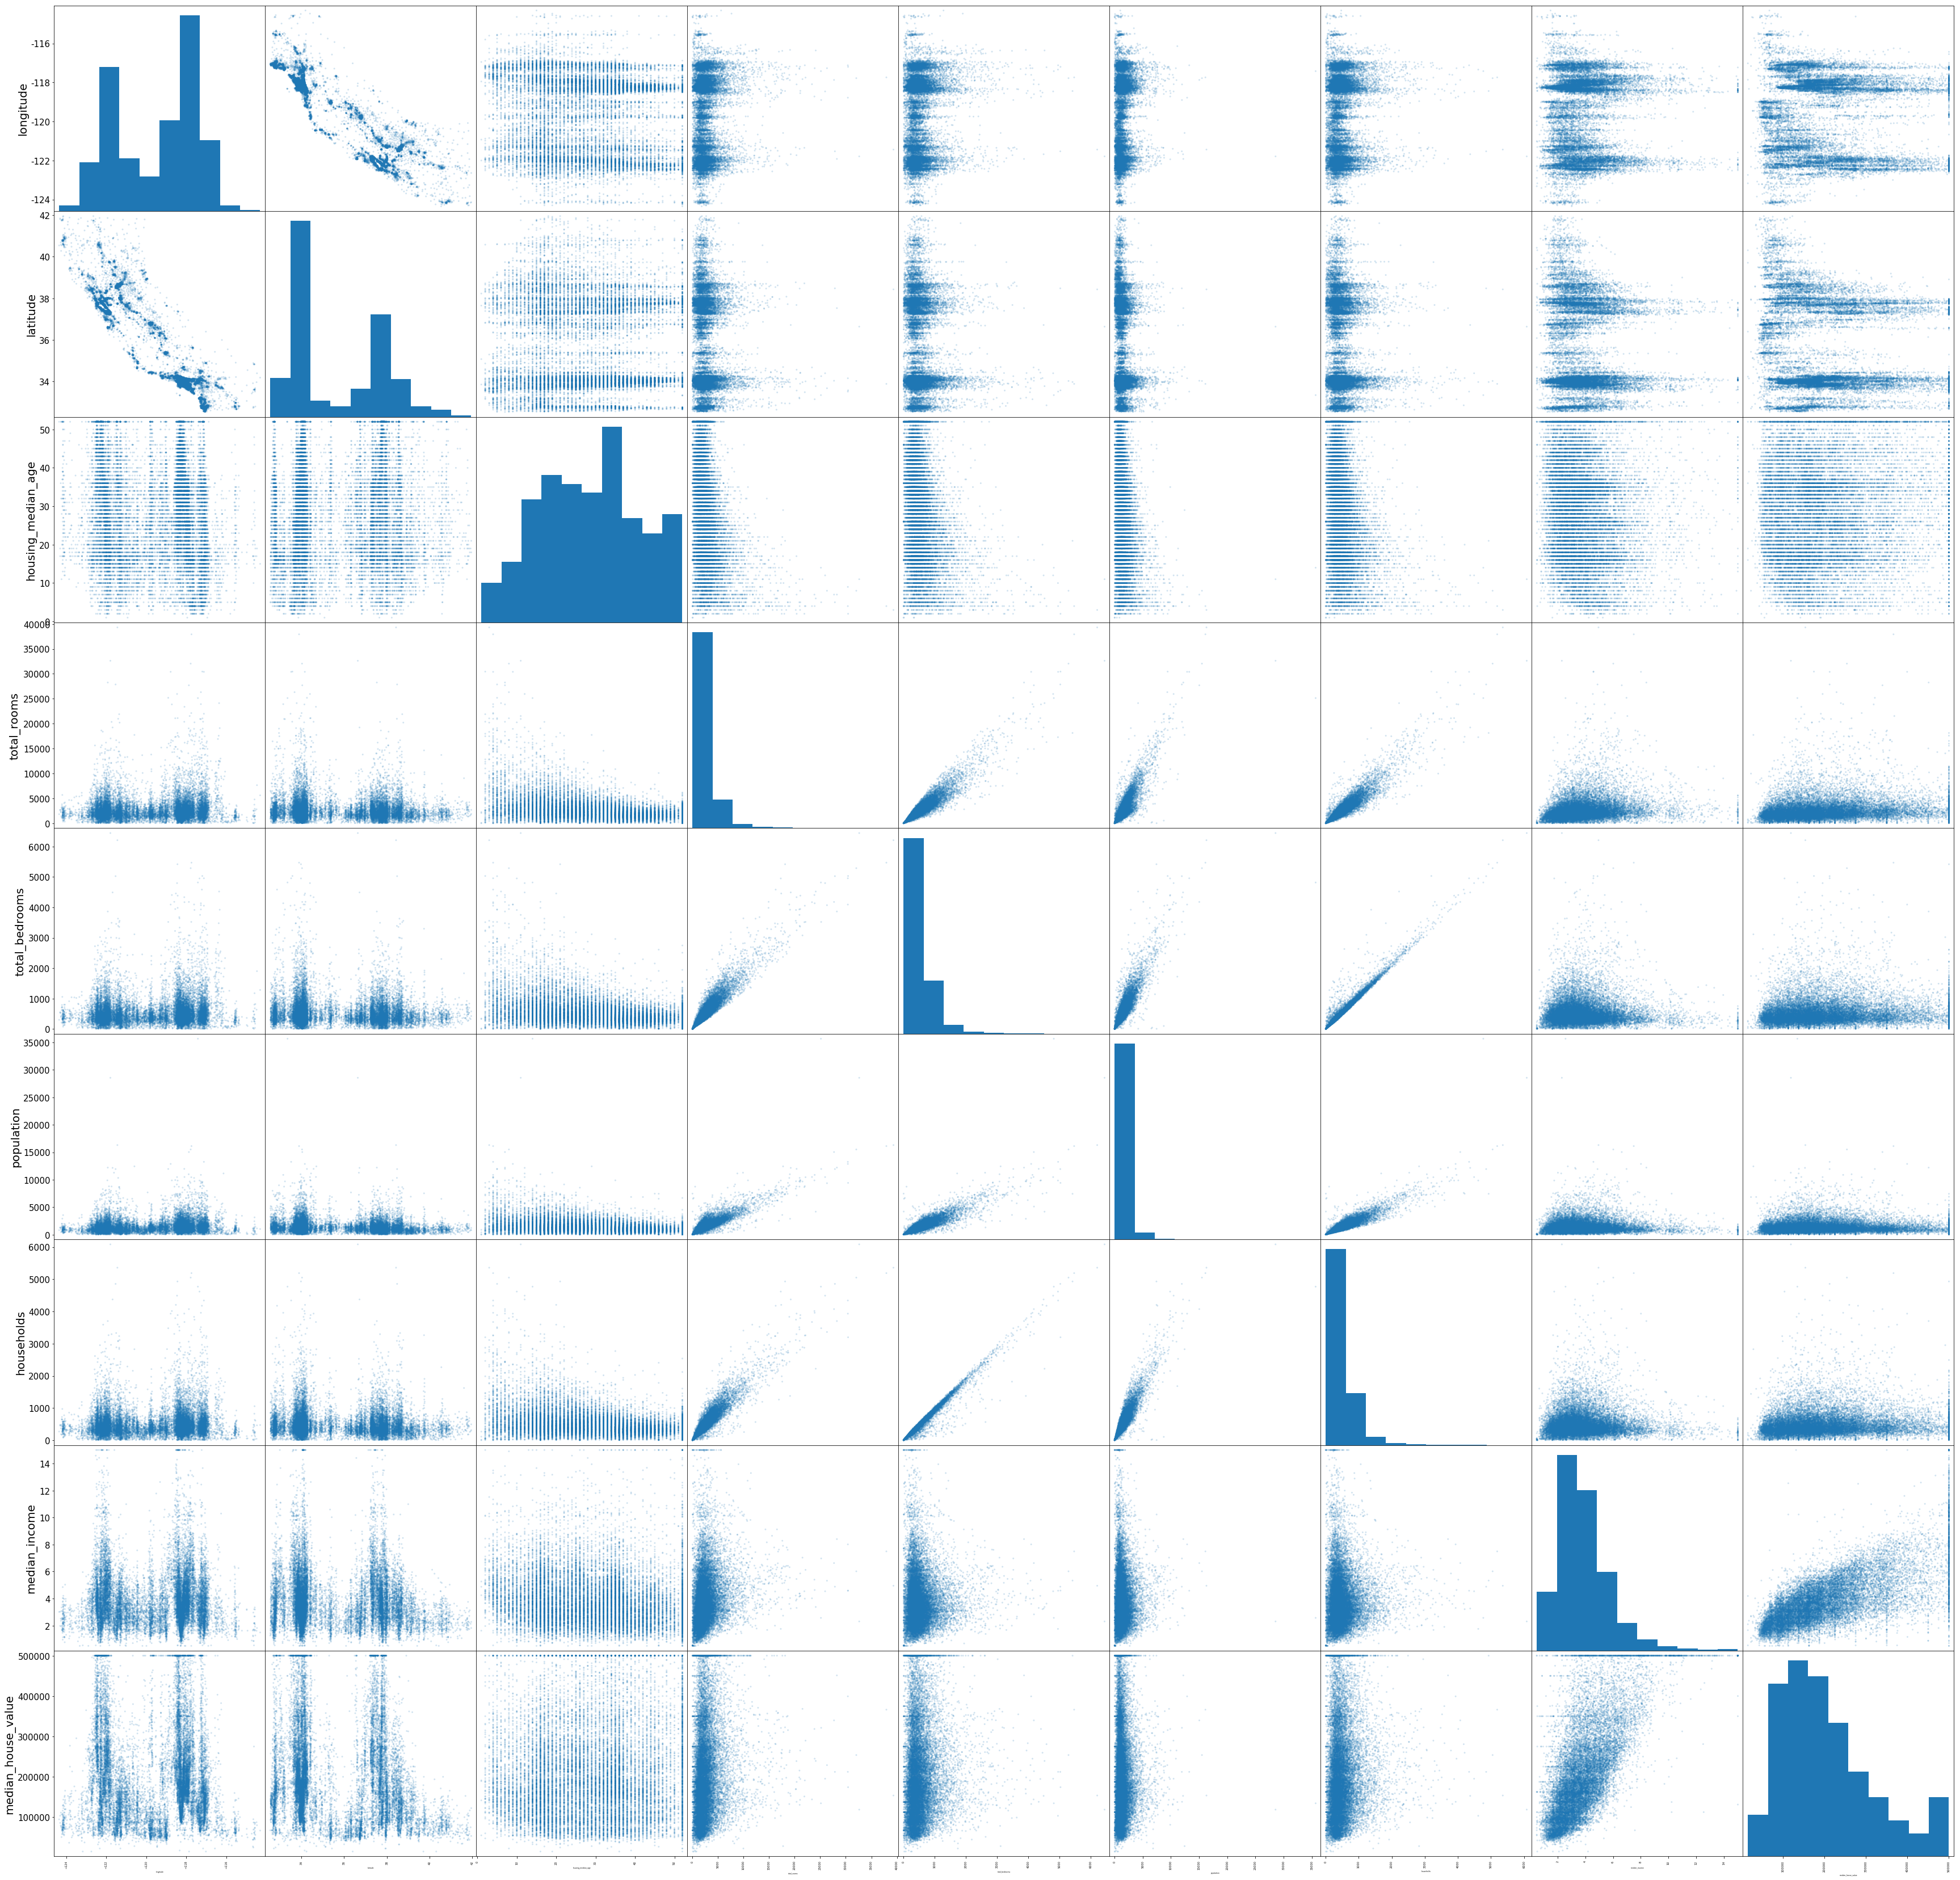

In [12]:
Axes = scatter_matrix(data_new.iloc[:,0:9], alpha=0.2, figsize=(60, 60), diagonal='hist')

#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 5) for item in Axes.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 20) for item in Axes.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 3) for item in Axes.ravel()]

### Dropping rows with NaNs

In [13]:
data_new["total_bedrooms"].isnull().sum()

207

In [14]:
data_new.dropna(inplace = True)

In [15]:
with pd.option_context('display.max_rows', 1000, 'display.max_columns', 300): # shows more of the df
    display(data_new)
data_new.shape

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
5        -122.25     37.85                  52          919           213.0   
6        -122.25     37.84                  52         2535           489.0   
7        -122.25     37.84                  52         3104           687.0   
8        -122.26     37.84                  42         2555           665.0   
9        -122.25     37.84                  52         3549           707.0   
10       -122.26     37.85                  52         2202           434.0   
11       -122.26     37.85                  52         3503           752.0   
12       -122.26     37.85                  52         2491           474.0   
13       -122.26     37.84                  52          696           191.0   
14       -122.26     37.85                  52         2643           626.0   
15       -122.26     37.85                  50         1120           283.0   
16       -122.27     37.85                  52         1966           347.0   
17       -122.27     37.85                  52         1228           293.0   
18       -122.26     37.84                  50         2239           455.0   
19       -122.27     37.84                  52         1503           298.0   
20       -122.27     37.85                  40          751           184.0   
21       -122.27     37.85                  42         1639           367.0   
22       -122.27     37.84                  52         2436           541.0   
23       -122.27     37.84                  52         1688           337.0   
24       -122.27     37.84                  52         2224           437.0   
25       -122.28     37.85                  41          535           123.0   
26       -122.28     37.85                  49         1130           244.0   
27       -122.28     37.85                  52         1898           421.0   
28       -122.28     37.84                  50         2082           492.0   
29       -122.28     37.84                  52          729           160.0   
30       -122.28     37.84                  49         1916           447.0   
31       -122.28     37.84                  52         2153           481.0   
32       -122.27     37.84                  48         1922           409.0   
33       -122.27     37.83                  49         1655           366.0   
34       -122.27     37.83                  51         2665           574.0   
35       -122.27     37.83                  49         1215           282.0   
36       -122.27     37.83                  48         1798           432.0   
37       -122.28     37.83                  52         1511           390.0   
38       -122.26     37.83                  52         1470           330.0   
39       -122.26     37.83                  52         2432           715.0   
40       -122.26     37.83                  52         1665           419.0   
41       -122.26     37.83                  51          936           311.0   
42       -122.26     37.84                  49          713           202.0   
43       -122.26     37.84                  52          950           202.0   
44       -122.26     37.83                  52         1443           311.0   
45       -122.26     37.83                  52         1656           420.0   
46       -122.26     37.83                  50         1125           322.0   
47       -122.27     37.82                  43         1007           312.0   
48       -122.26     37.82                  40          624           195.0   
49       -122.27     37.82                  40          9

(20433, 14)

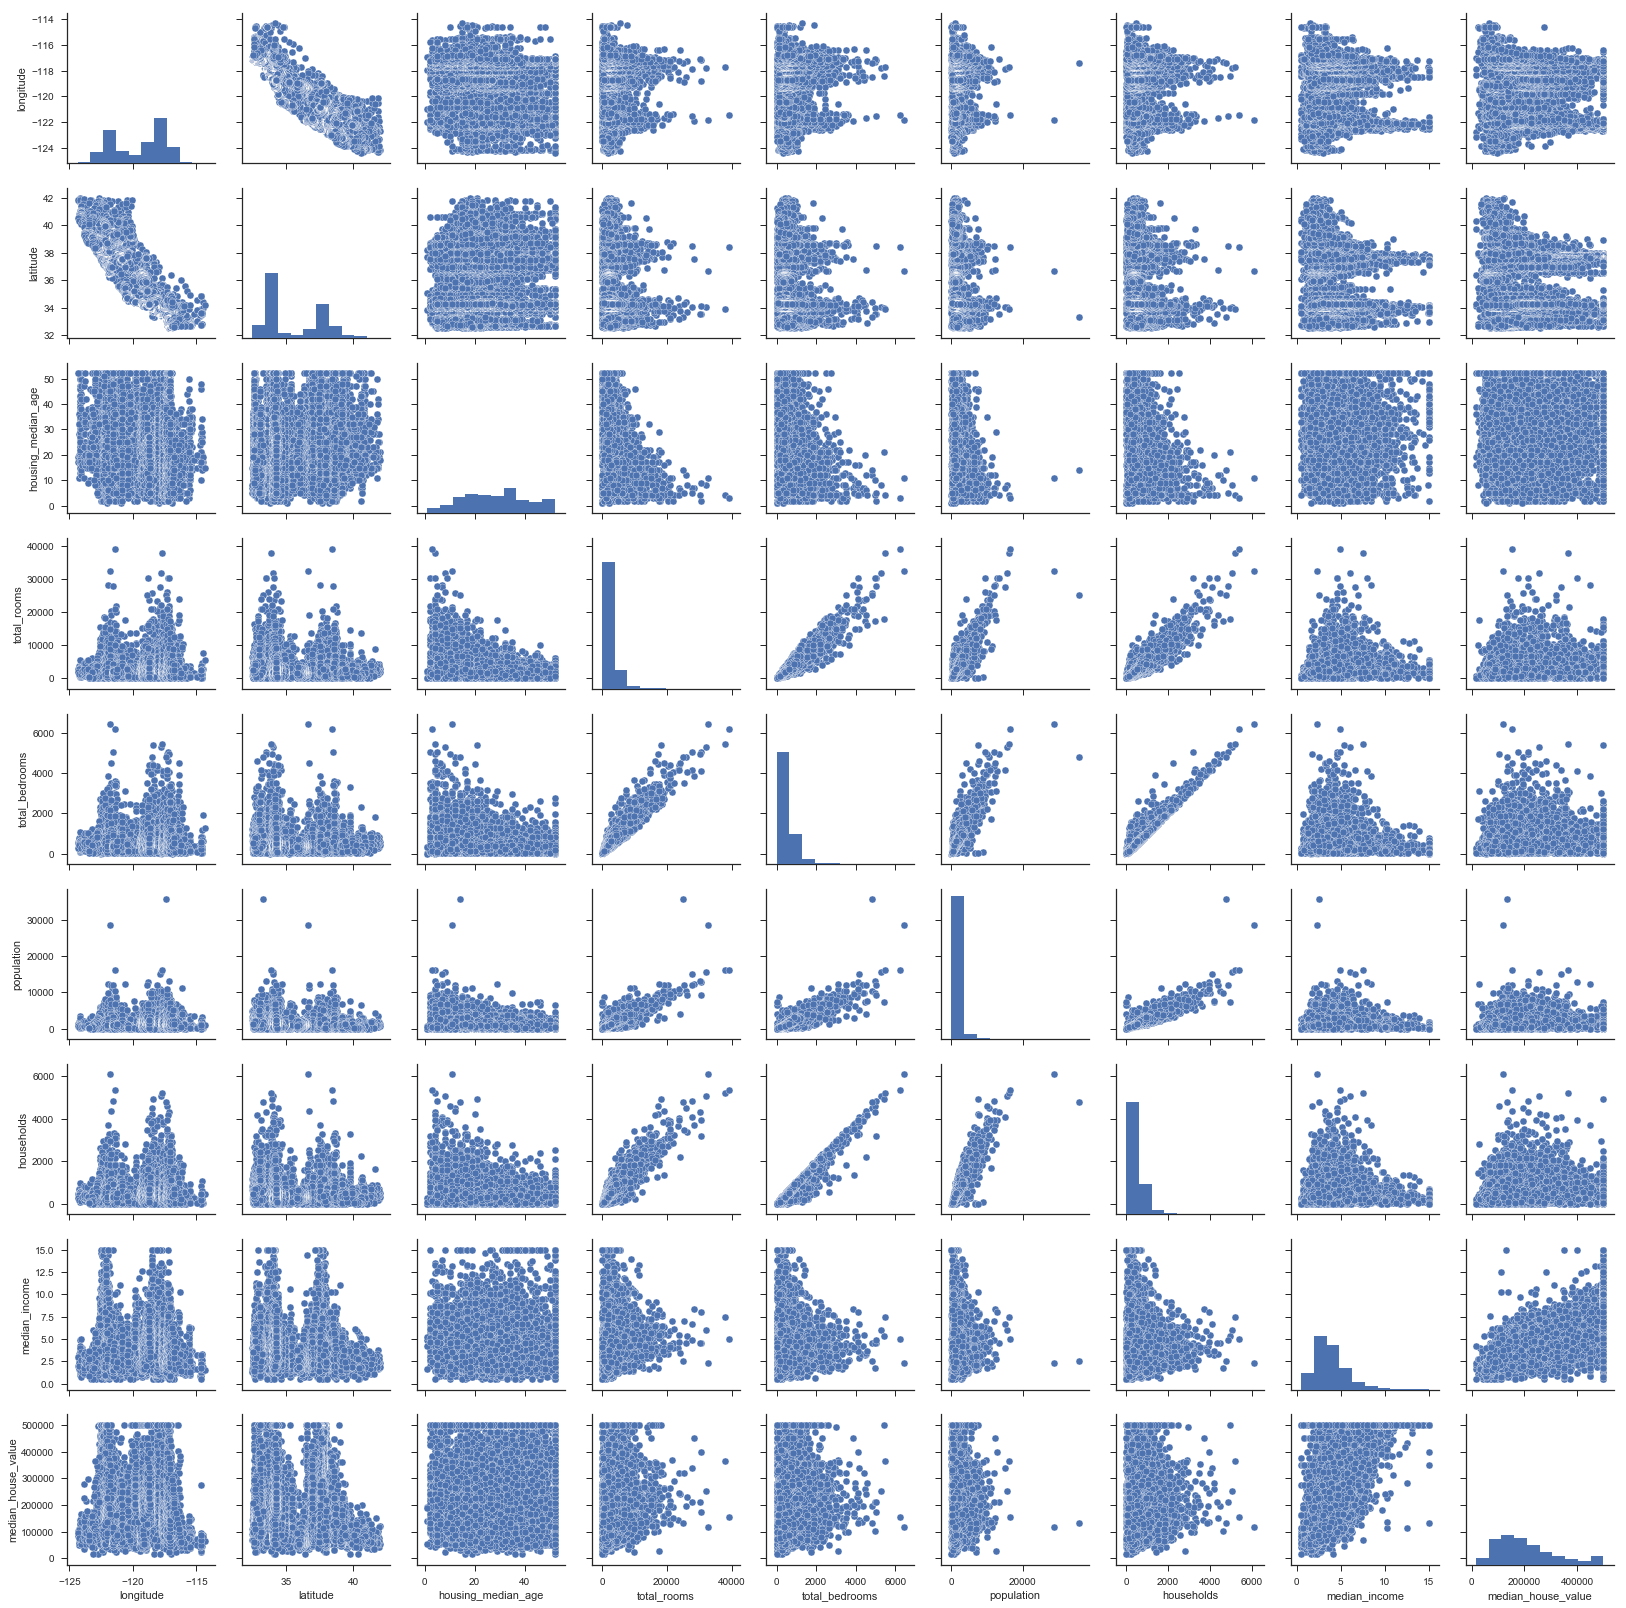

In [16]:
import seaborn as sns
sns.set(style="ticks")
test = data_new.iloc[:,[0,1,2,3,4,5,6,7,8]]
sns.pairplot(test)

### Split in Training and Test data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
data_new.iloc[0,[0,1,2,3,4,5,6,7,9,10,11,12,13]]

longitude            -122.2300
latitude               37.8800
housing_median_age     41.0000
total_rooms           880.0000
total_bedrooms        129.0000
population            322.0000
households            126.0000
median_income           8.3252
<1H OCEAN               0.0000
INLAND                  0.0000
ISLAND                  0.0000
NEAR BAY                1.0000
NEAR OCEAN              0.0000
Name: 0, dtype: float64

In [19]:
train_X, test_X, train_y,test_y = train_test_split(data_new.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,13]], data_new["median_house_value"], test_size=0.2, random_state=42)

In [20]:
train_X.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17727    -121.80     37.32                  14         4412           924.0   
2057     -119.63     36.64                  33         1036           181.0   
6453     -118.06     34.12                  25         3891           848.0   
4619     -118.31     34.07                  28         2362           949.0   
15266    -117.27     33.04                  27         1839           392.0   

       population  households  median_income  <1H OCEAN  INLAND  ISLAND  \
17727        2698         891         4.7027        1.0     0.0     0.0   
2057          620         174         3.4107        0.0     1.0     0.0   
6453         1848         759         3.6639        0.0     1.0     0.0   
4619         2759         894         2.2364        1.0     0.0     0.0   
15266        1302         404         3.5500        0.0     0.0     0.0   

       NEAR BAY  NEAR OCEAN  
17727       0.0         0.0  
2057        0.0         0.0  
6453        0.0         0.0  
4619        0.0         0.0  
15266       0.0         1.0

### Scaling to mean 0 and unit variance

In [21]:
#print(test_X.head())
scaler = preprocessing.StandardScaler()
scaler.fit(train_X.iloc[:,0:8])
train_X.iloc[:,0:8] = scaler.transform(train_X.iloc[:,0:8])
test_X.iloc[:,0:8] = scaler.transform(test_X.iloc[:,0:8])
#train_X.head()

test_X.head()

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14416    -117.24     32.79                  20          961           278.0   
16383    -121.29     38.01                   2         6403          1116.0   
7731     -118.14     33.92                  31         3731           853.0   
1410     -122.07     37.94                  30         1260           276.0   
1335     -121.89     37.99                   4         2171           597.0   

       population  households  median_income  <1H OCEAN  INLAND  ISLAND  \
14416         525         254         3.1838        0.0     0.0     0.0   
16383        3327         957         4.4871        0.0     1.0     0.0   
7731         2313         801         3.2237        1.0     0.0     0.0   
1410          707         221         2.8920        0.0     0.0     0.0   
1335          928         461         4.1016        0.0     1.0     0.0   

       NEAR BAY  NEAR OCEAN  
14416       0.0         1.0  
16383       0.

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14416   1.166852 -1.334464           -0.684993    -0.773389       -0.618165   
16383  -0.852256  1.109224           -2.116201     1.753964        1.389223   
7731    0.718161 -0.805466            0.189634     0.513044        0.759220   
1410   -1.241122  1.076455            0.110122    -0.634529       -0.622956   
1335   -1.151383  1.099862           -1.957178    -0.211446        0.145984   

       population  households  median_income  <1H OCEAN  INLAND  ISLAND  \
14416   -0.793019   -0.644504      -0.361950        0.0     0.0     0.0   
16383    1.688071    1.215354       0.324805        0.0     1.0     0.0   
7731     0.790203    0.802640      -0.340925        1.0     0.0     0.0   
1410    -0.631863   -0.731809      -0.515710        0.0     0.0     0.0   
1335    -0.436174   -0.096865       0.121671        0.0     1.0     0.0   

       NEAR BAY  NEAR OCEAN  
14416       0.0         1.0  
16383       0.0         0.0  
7731        0.0         0.0  
1410        1.0         0.0  
1335        0.0         0.0

In [22]:
"""import seaborn as sns
sns.set(style="ticks")
test = train_X.iloc[:,[0,1,2,3,4,5,6,7]]
sns.pairplot(test)"""

'import seaborn as sns\nsns.set(style="ticks")\ntest = train_X.iloc[:,[0,1,2,3,4,5,6,7]]\nsns.pairplot(test)'

In [23]:
lin = linear_model.LinearRegression()
lin.fit(train_X, train_y) 
#pred_lin = lin.predict(train_X_within)
pred_lin = lin.predict(test_X)

In [32]:
R2_lin = lin.score(test_X, test_y)
R2_lin
display(lin_coefficients)

array([-54375.70649682, -54808.036235  ,  13600.08831297, -13613.10262855,
        42999.85290993, -41119.06758656,  16307.3411779 ,  74538.73815516,
       -34269.44338727, -73509.66116574, 179383.93107555, -40501.86026351,
       -31102.96625903])

In [28]:
lin_coefficients = lin.coef_
coef_df = pd.DataFrame(data = lin_coefficients,columns = train_X.columns)

ValueError: Shape of passed values is (1, 13), indices imply (13, 13)

In [29]:
train_X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')